In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#le fichier était codé via Excel, c'était en Windows ANSI soit cp1252 pour l'Europe de l'Ouest
#https://docs.python.org/3/library/codecs.html#standard-encodings
df=pd.read_csv('cl_JUIN_2013-complet3.csv',sep=';')#,encoding='cp1252')
df.head()


,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

In [4]:
#les émissions de particules, en particulier de HC comportent beaucoup de valeurs manquantes, comme notre étude porte
#sur l'émission de CO2 uniquement, je supprime les colonnes CO type I, HC, NOX, HC+NOX et particules
#en effet, outre les manquants ces valeurs sont un constat, comme le CO2
#elles ont bien sûr un impact environnemental, mais ce n'est pas celui que nous cherchons aujourd'hui
df.drop(['CO type I (g/km)','HC (g/km)','HC (g/km)','NOX (g/km)','HC+NOX (g/km)','Particules (g/km)'],axis=1,inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

In [6]:
#il reste peu de valeurs manquantes, je vais donc les droper
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44612 entries, 0 to 44849
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44612 non-null  object 
 1   Modèle dossier                        44612 non-null  object 
 2   Modèle UTAC                           44612 non-null  object 
 3   Désignation commerciale               44612 non-null  object 
 4   CNIT                                  44612 non-null  object 
 5   Type Variante Version (TVV)           44612 non-null  object 
 6   Carburant                             44612 non-null  object 
 7   Hybride                               44612 non-null  object 
 8   Puissance administrative              44612 non-null  int64  
 9   Puissance maximale (kW)               44612 non-null  float64
 10  Boîte de vitesse                      44612 non-null  object 
 11  Consommation ur

In [7]:
#check les duplicated
print("Nombre de duplicate",df.duplicated().sum())                   # compte le nombre de ligne double (451)

#suppression des duplicated
df=df.drop_duplicates(keep = 'first')    #44161 valeur non nul
print("Nombre de duplicate", df.duplicated().sum())                    # compte le nombre de ligne double (0)
display(df.info())

Nombre de duplicate 451
Nombre de duplicate 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44161 entries, 0 to 44849
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44161 non-null  object 
 1   Modèle dossier                        44161 non-null  object 
 2   Modèle UTAC                           44161 non-null  object 
 3   Désignation commerciale               44161 non-null  object 
 4   CNIT                                  44161 non-null  object 
 5   Type Variante Version (TVV)           44161 non-null  object 
 6   Carburant                             44161 non-null  object 
 7   Hybride                               44161 non-null  object 
 8   Puissance administrative              44161 non-null  int64  
 9   Puissance maximale (kW)               44161 non-null  float64
 10  Boîte de vitesse                    

None

In [8]:
#nous regardons les ordres de grandeurs des variables numériques restantes
df.describe()

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),masse vide euro min (kg),masse vide euro max (kg)
count,44161.000000,44161.000000,44161.000000,44161.000000,44161.000000,44161.000000,44161.000000,44161.000000
mean,11.075678,125.317167,9.692921,6.565380,7.710322,199.318879,2077.007926,2175.514708
std,5.561663,49.165067,2.314332,1.165564,1.558255,38.310760,333.788653,401.225106
min,3.000000,40.000000,0.000000,2.800000,1.800000,48.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.400000,7.200000,189.000000,1976.000000,2075.000000
50%,10.000000,120.000000,9.800000,6.700000,7.700000,203.000000,2076.000000,2185.000000
75%,11.000000,125.000000,10.600000,7.100000,8.400000,221.000000,2245.000000,2355.000000
max,81.000000,559.300000,41.100000,14.900000,24.500000,572.000000,2905.000000,3094.000000


In [9]:
#Les max sont parfois très importants, mais ils ne semnblent pas aberrants à l'oeil nu, nous regarderons donc les distributions
#pour les min la consommation urbaine à 0 nous semble étrange, même pour une hybride nous allons donc regarder de plus près les lignes concernées
df[df['Consommation urbaine (l/100km)']==0]

#il s'agit d'une voiture hybride, donc cela revient à considérer que la voiture fonctionne à 100% en électrique en ville. 
#nous allons regarder les statistiques pour les autres hybrides pour savoir si c'est complètement aberrant ou pas

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
44820,VOLVO,V60 HYBRID,V60,V60 PLUG-IN HYBRID D6 Geartronic 6 AWD,M10VLVVP872D495,GWAA50,GL,oui,10,158.0,...,0.0,5.5,1.8,48.0,1954,1954,715/2007*459/2012EURO5,juin-13,BREAK,SUPERIEURE


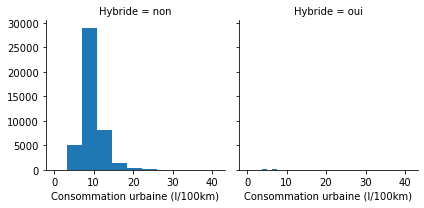

In [10]:
g=sns.FacetGrid(df, col='Hybride')
g.map(plt.hist, 'Consommation urbaine (l/100km)');
#L'ordre de grandeur est tellement différent entre hybride ou non que ce graph n'est pas du tout révélateur en l'état, 
#pour l'instant, juste pour identifier si la Volvo est une valeur aberrante nous allons faire un pd.crosstab

In [11]:
pd.crosstab(df['Hybride'],df['Consommation urbaine (l/100km)'],rownames=['Hybride ?'],colnames=['Conso. urbaine'])
#on voit ici que même pour une hybride 0 de consommation urbaine n'est pas crédible, nous supprimons donc la ligne

Conso. urbaine,0.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,23.8,24.3,24.4,24.7,24.9,25.2,25.3,25.6,38.9,41.1
Hybride ?,,,,,,,,,,,,,,,,,,,,,
non,0,0,0,2,2,2,5,2,8,8,...,1,8,2,2,1,28,2,2,2,2
oui,1,3,1,0,1,0,0,8,2,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.drop(df[df['Consommation urbaine (l/100km)'] == 0].index, inplace=True)

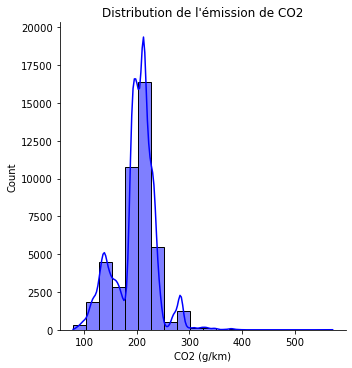

In [13]:
#il n'y a lus de valeurs manquantes ni aberrante de façon évidente, nous regardons donc les données un peu plus dans le détail. 
#en commençant par la cible de notre étude : la distribution de l'émission en CO2
sns.displot(df['CO2 (g/km)'],bins=20,kind='hist',kde=True,color='blue')
plt.title("Distribution de l'émission de CO2");
#la distribution est trés centrée autour de 200, au delà de 350 il y a très peu de cas, cela se devinait d&éjà avec le describe qui place 
#le 3ème quartile à 221 et l'écart type à 38,8
#nous allons zoomer sur les véhicules avec une consommation supérieure à 350 g/km pour voir plus en détail la répartition. 


In [14]:
df350=df[df['CO2 (g/km)']>=350]
df350.describe()


,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),masse vide euro min (kg),masse vide euro max (kg)
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,52.958904,427.865753,25.130137,11.471233,16.468493,384.589041,1940.698630,1951.794521
std,9.450806,51.134687,3.769456,0.962560,1.957739,45.139548,472.005493,465.685604
min,38.000000,331.000000,21.900000,10.100000,14.600000,350.000000,1555.000000,1575.000000
25%,48.000000,405.000000,23.600000,11.300000,15.800000,368.000000,1615.000000,1625.000000
50%,50.000000,412.000000,24.900000,11.300000,16.300000,379.000000,1755.000000,1755.000000
75%,57.000000,450.000000,25.200000,11.600000,16.300000,380.000000,1971.000000,2013.000000
max,81.000000,559.300000,41.100000,14.900000,24.500000,572.000000,2905.000000,2905.000000


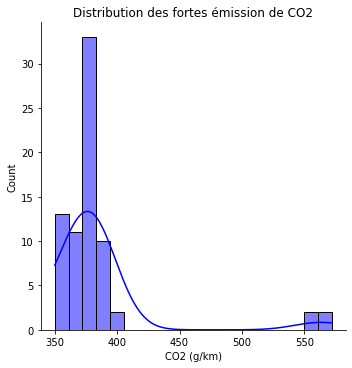

In [15]:
sns.displot(df350['CO2 (g/km)'],bins=20,kind='hist',kde=True,color='blue')
plt.title("Distribution des fortes émission de CO2");
#il y a un gap entre 400 et 550 sans aucun véhicule
#les plus gros consommateurs sont donc très dissociés des autres. 
#nous allons regarder de quels véhicules il s'agit

In [16]:
df[df['CO2 (g/km)']>=550]
#Ce sont 4 versions du même modèle

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
115,ASTON MARTIN,ONE-77,ONE-77,ONE-77,M10SCFVP000R087,VHYA1RONE77,ES,non,80,559.3,...,38.9,14.5,23.9,555.0,1815,1815,715/2007*692/2008EURO5,mars-13,COUPE,LUXE
116,ASTON MARTIN,ONE-77,ONE-77,ONE-77,M10SCFVP000Y155,VHYA1RONE77,ES,non,81,559.3,...,41.1,14.9,24.5,572.0,1815,1815,715/2007*692/2008EURO5,mars-13,COUPE,LUXE
117,ASTON MARTIN,ONE-77,ONE-77,ONE-77,M10SCFVP000S088,VHYA2LONE77,ES,non,80,559.3,...,38.9,14.5,23.9,555.0,1815,1815,715/2007*692/2008EURO5,mars-13,COUPE,LUXE
118,ASTON MARTIN,ONE-77,ONE-77,ONE-77,M10SCFVP000Z156,VHYA2LONE77,ES,non,81,559.3,...,41.1,14.9,24.5,572.0,1815,1815,715/2007*692/2008EURO5,mars-13,COUPE,LUXE


In [17]:
#distribution des types de carburants 
df['Carburant'].value_counts()


GO       37680
ES        6104
EH         199
GN          59
GH          54
GP/ES       17
ES/GP       17
ES/GN       11
GN/ES       11
FE           8
Name: Carburant, dtype: int64

In [18]:
#nous pensions regrouper les valeurs avec un "/" dde la façon suivante  : GN/ES = ES/GN et GP/ES=ES/GP
#mais après analyse les valeurs de consommation et de  CO2 émis ne sont pas les mêmes selon l'ordre dans 
#lequel le carburant est spécifié cette étape est donc annulée.
#df['Carburant']=df['Carburant'].replace({'ES/GP': 'GP/ES', 'ES/GN': 'GN/ES'})
#df['Carburant'].value_counts()

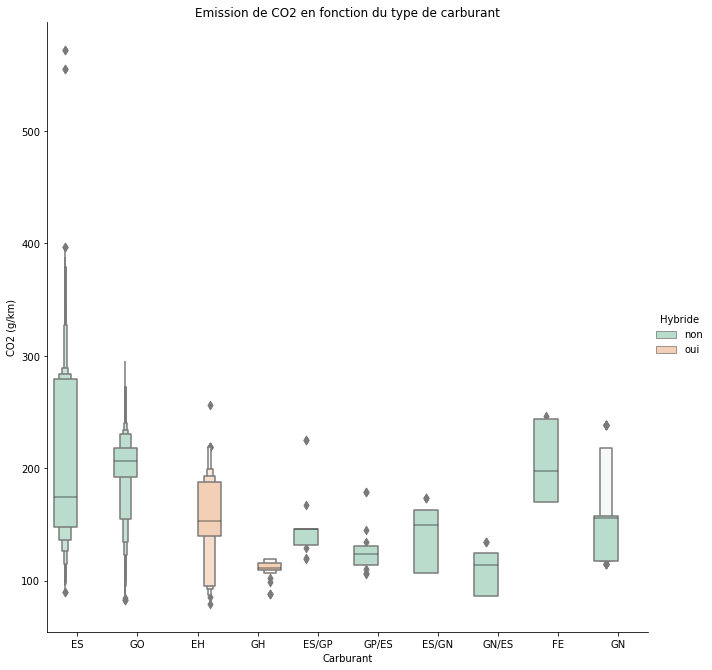

In [19]:
#zoom sur l'impact du type de carburant sur l'émission de CO2 en croisant avec la notion d'hybride
sns.catplot(x='Carburant', y='CO2 (g/km)', kind='boxen', hue='Hybride',palette="Pastel2", data=df ,height=9, aspect=4/4)
plt.title("Emission de CO2 en fonction du type de carburant");
#On voit ici que l'essence ES a une médiane plus basse que le diesel GO, mais avec un plus grand ecart type.
#les véhicules ayant la médiane la plus basse sont Gazole-électricité (hybride non rechargeable) GH, ceux mélangeant Gaz naturel et essence GN/ES 
#et ceux mélangeant GPL et essence GP/ES. Et cela avec des écart-types relativement faibles.

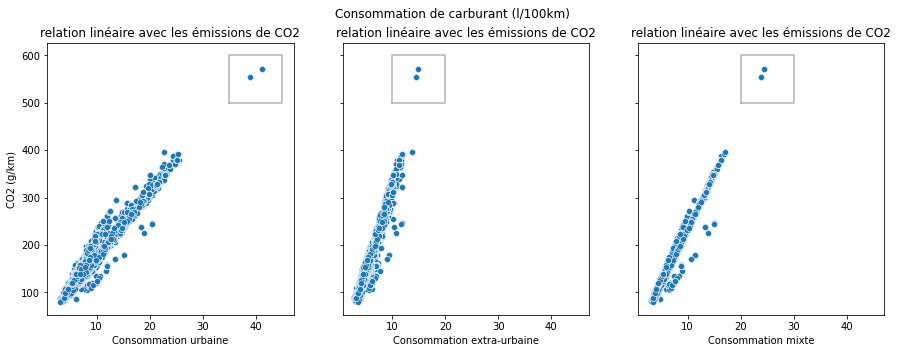

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Consommation de carburant (l/100km)')

sns.scatterplot(ax=axes[0], x='Consommation urbaine (l/100km)', y='CO2 (g/km)', data=df)
axes[0].set_title('relation linéaire avec les émissions de CO2')
axes[0].set_xlabel('Consommation urbaine')
axes[0].plot([35, 45, 45, 35, 35],[500, 500, 600, 600, 500],'black', alpha = 0.3)

sns.scatterplot(ax=axes[1], x='Consommation extra-urbaine (l/100km)', y='CO2 (g/km)', data=df)
axes[1].set_title('relation linéaire avec les émissions de CO2')
axes[1].set_xlabel('Consommation extra-urbaine')
axes[1].plot([10, 20, 20, 10, 10],[500, 500, 600, 600, 500],'black', alpha = 0.3)

sns.scatterplot(ax=axes[2], x='Consommation mixte (l/100km)', y='CO2 (g/km)', data=df)
axes[2].set_title('relation linéaire avec les émissions de CO2')
axes[2].set_xlabel('Consommation mixte')
axes[2].plot([20, 30, 30, 20, 20],[500, 500, 600, 600, 500],'black', alpha = 0.3);

In [21]:
#nous allonrs maintenant regarder la distribution de la gamme, du modèle et de la carosserie
#cela permet de repréer le nombre de valeurs différentes possibles et les valeurs aberrantes éventuelles
df['gamme'].value_counts()


MOY-INFER     20138
MOY-SUPER     15039
LUXE           5218
SUPERIEURE     1954
INFERIEURE     1622
ECONOMIQUE      187
MOY-INF           2
Name: gamme, dtype: int64

In [22]:
#MOY-INF est à regrouper avec MOY_INFER
df['gamme']=df['gamme'].replace('MOY-INF', 'MOY-INFER')
df['gamme'].value_counts()

MOY-INFER     20140
MOY-SUPER     15039
LUXE           5218
SUPERIEURE     1954
INFERIEURE     1622
ECONOMIQUE      187
Name: gamme, dtype: int64

In [23]:
df['Marque'].value_counts()
#il y a une surreprésentatuin des Mercedes... 


MERCEDES-BENZ                38255
VOLKSWAGEN                     900
BMW                            525
OPEL                           519
FIAT                           415
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        206
LEXUS                          175
MERCEDES AMG                   172
NISSAN                         172
PEUGEOT                        159
RENAULT                        153
TOYOTA                         110
SEAT                           105
VOLVO                          105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       62
JAGUAR LAND ROVER LIMITED       55
HYUNDAI                         52
HONDA                           51
MAZDA                           46
CADILLAC            

In [24]:
df['Carrosserie'].value_counts()

MINIBUS                32549
BERLINE                 4753
BREAK                   2228
TS TERRAINS/CHEMINS     1176
COUPE                   1100
COMBISPACE               880
MONOSPACE COMPACT        610
CABRIOLET                603
MINISPACE                147
MONOSPACE                114
Name: Carrosserie, dtype: int64

In [25]:
df['Modèle dossier'].value_counts()

VIANO             14031
VITO               9890
SPRINTER           8128
CLASSE E           2849
CLASSE C           1302
                  ...  
S6 AVANT              1
XK CONVERTIBLE        1
RS3                   1
S7 SPORTBACK          1
2171                  1
Name: Modèle dossier, Length: 446, dtype: int64

In [26]:
df['Modèle UTAC'].value_counts()

VIANO       14031
VITO         9890
SPRINTER     8128
E 250         674
E 200         670
            ...  
M5              1
M6              1
GENESIS         1
COLT            1
LANCER          1
Name: Modèle UTAC, Length: 409, dtype: int64

In [27]:
#La gamme et la carosserie ont-elles un lien ?
pd.crosstab(df['gamme'],df['Carrosserie'],rownames=['Gamme'],colnames=['Carrosserie'])

Carrosserie,BERLINE,BREAK,CABRIOLET,COMBISPACE,COUPE,MINIBUS,MINISPACE,MONOSPACE,MONOSPACE COMPACT,TS TERRAINS/CHEMINS
Gamme,,,,,,,,,,
ECONOMIQUE,105,0,19,0,25,0,38,0,0,0
INFERIEURE,459,32,28,862,11,0,109,0,0,121
LUXE,2288,1235,352,0,667,0,0,0,0,676
MOY-INFER,800,102,57,18,32,18411,0,54,610,56
MOY-SUPER,317,285,20,0,44,14138,0,0,0,235
SUPERIEURE,784,574,127,0,321,0,0,60,0,88


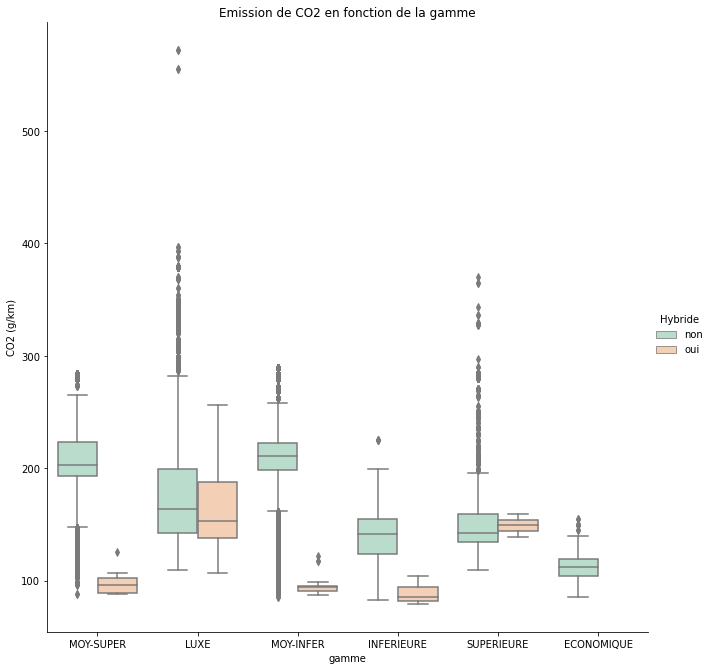

In [28]:
#gamme et carrosserie n'ont pas toujours de lien
#de la même façon que précédemment nous regardons la consommation de CO2 en fonction de la gamme et de la carrosserie

sns.catplot(x='gamme', y='CO2 (g/km)', kind='box',hue="Hybride", palette="Pastel2", data=df,  height=9, aspect=4/4)
plt.title("Emission de CO2 en fonction de la gamme");
#On voit ici que les modèles non hybrides de gamme moyenne (inférieurs et supérieurs) ont une médiane plus élevés que les autres avec un écart type moyen
#les véhicules de luxe hybrides émettent presqu'autant de CO2 que les modèles de luxe non hybride, et pour les modèles supérieurs les hybrides émettent un peu plus
#que les non hybrides 
#Pour les véhicules de gammes moyennes et inférieure en revanche l'hybridation diminue fortement le taux d'émission de CO2
#les véhicules non hybrides ayant la médiane la plus basse sont les véhicules économiques


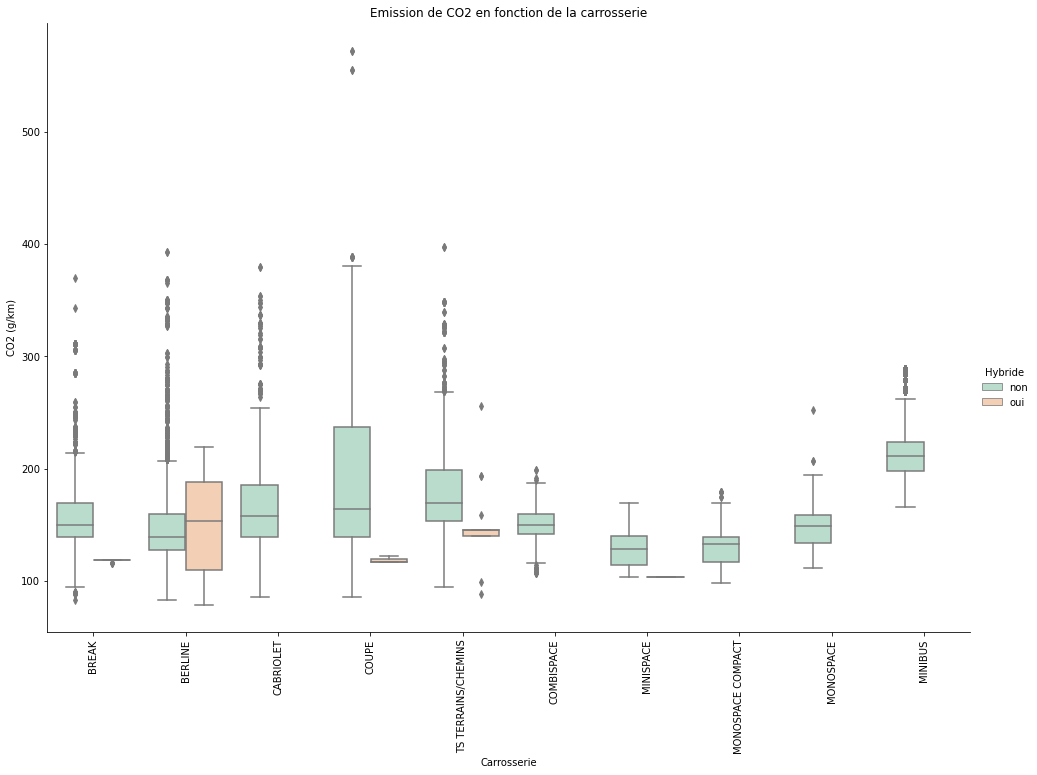

In [29]:
sns.catplot(x='Carrosserie', y='CO2 (g/km)', kind='box',hue="Hybride",palette="Pastel2", data=df,  height=9, aspect=6/4)
plt.xticks(rotation=90)
plt.title("Emission de CO2 en fonction de la carrosserie");
#On voit ici que les minibus ont une médiane plus élevés que les autres avec un écart type faible
#la médiane d'émission de CO2 des berline hybrides est plus importante que celle des non hybrides, mais avec une plus faible dispersion.
#les minispace et les monospaces compacts ont la médiane d'émission la plus faible. 
#Les berlines, cabriolets et coupés ont les modèles avec les émissions minimales les plus faibles.

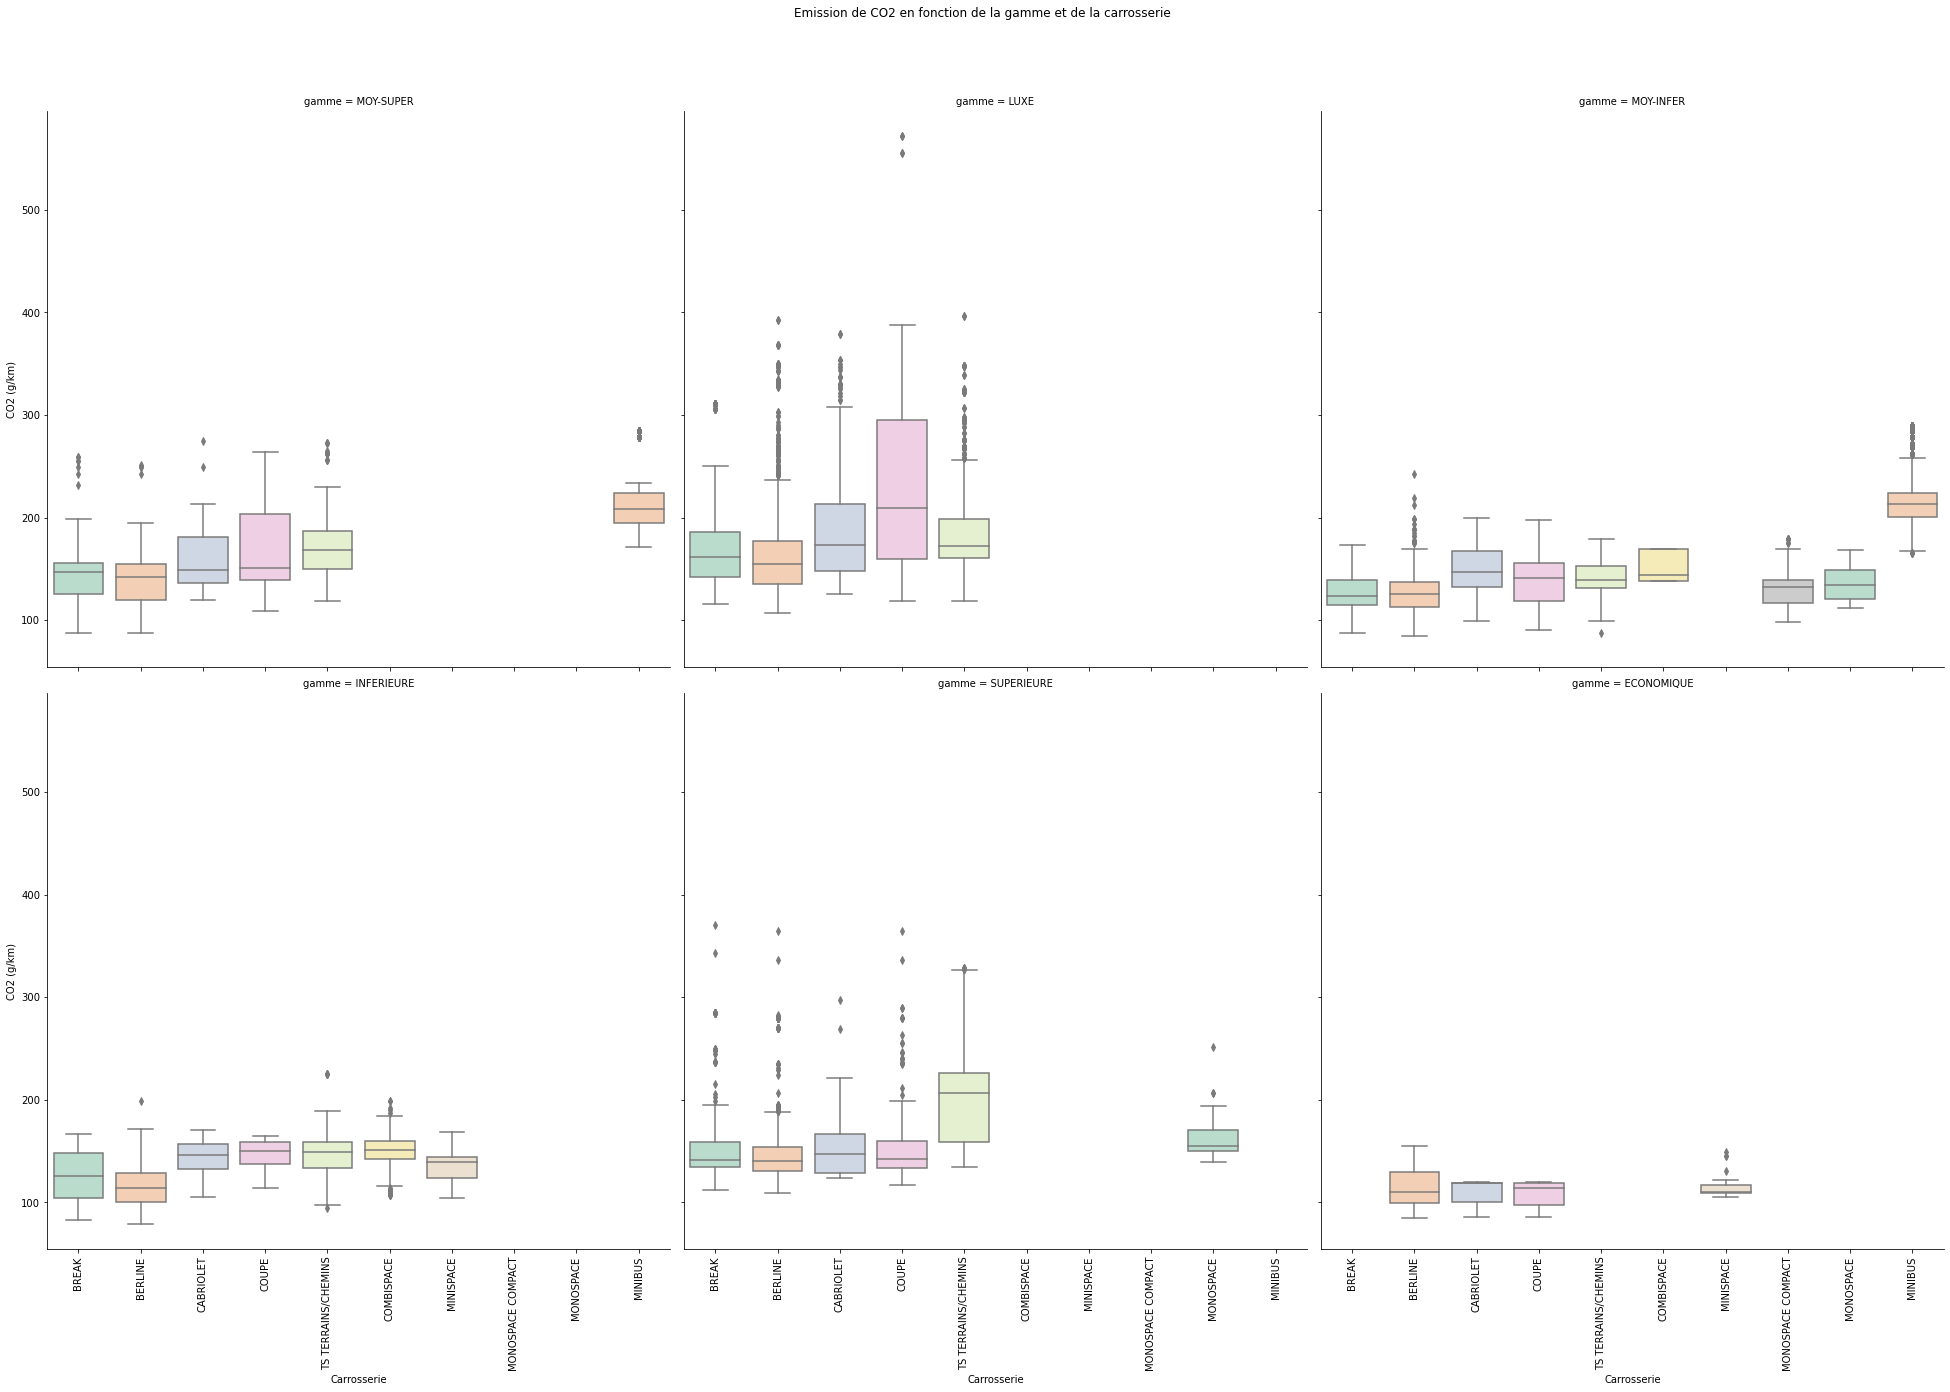

In [30]:

g=sns.catplot(x='Carrosserie', y='CO2 (g/km)', kind='box',col="gamme",col_wrap=3,palette="Pastel2", data=df,height=9, aspect=1)
g.set_xticklabels(rotation=90)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Emission de CO2 en fonction de la gamme et de la carrosserie');
#Quand on met les 2 informations sur le même graphique, on voit que les gammes moyennes émettent plus au global (cf graphs précédents) du fait de l'impact des minibus, sinon pour les autres carrosseries ce sont les 
#modèles de luxe qui ont les médianes les plus importantes (sauf pour les tous terrains pour lesqueles ce sont les modèles supérieurs qui ont la palme de l'émission de CO2)

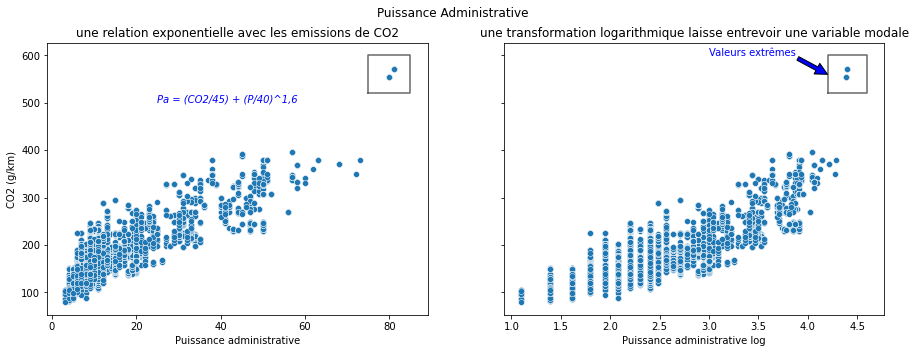

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Puissance Administrative')

df['Puissance administrative log'] = np.log(df['Puissance administrative'])
sns.scatterplot(ax=axes[0], x='Puissance administrative', y='CO2 (g/km)', data=df)
axes[0].set_title('une relation exponentielle avec les emissions de CO2')
axes[0].text(25, 500, 'Pa = (CO2/45) + (P/40)^1,6', color='b', fontstyle='italic')
axes[0].plot([75, 85, 85, 75, 75],[520, 520, 600, 600, 520],'black', alpha = 0.6)

sns.scatterplot(ax=axes[1], x='Puissance administrative log', y='CO2 (g/km)', data=df)
axes[1].set_title('une transformation logarithmique laisse entrevoir une variable modale')
axes[1].plot([4.2, 4.6, 4.6, 4.2, 4.2],[520, 520, 600, 600, 520],'black', alpha = 0.6)
axes[1].annotate('Valeurs extrêmes', xy=(4.2, 560), xytext=(3, 600), c='b', arrowprops={'facecolor':'b'});

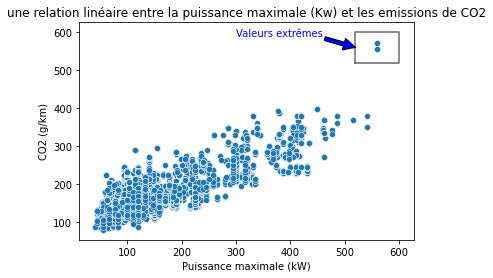

In [32]:
plt.title('une relation linéaire entre la puissance maximale (Kw) et les emissions de CO2')
sns.scatterplot(x='Puissance maximale (kW)', y='CO2 (g/km)', data=df)
plt.plot([520, 600, 600, 520, 520],[520, 520, 600, 600, 520],'black', alpha = 0.6)
plt.annotate('Valeurs extrêmes', xy=(520, 560), xytext=(300, 590), c='b', arrowprops={'facecolor':'b'});

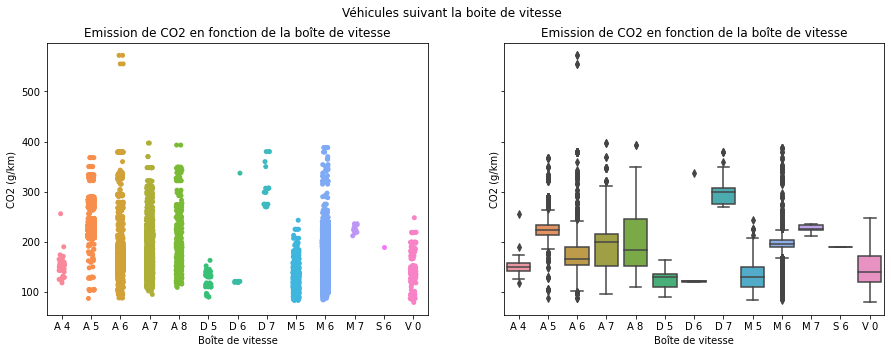

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Véhicules suivant la boite de vitesse')

sns.stripplot(ax=axes[0], y='CO2 (g/km)', x='Boîte de vitesse', data=df.sort_values(by = 'Boîte de vitesse'))
axes[0].set_title('Emission de CO2 en fonction de la boîte de vitesse')

sns.boxplot(ax=axes[1], x='Boîte de vitesse', y='CO2 (g/km)', data=df.sort_values(by = 'Boîte de vitesse'))
axes[1].set_title('Emission de CO2 en fonction de la boîte de vitesse');

#On voit ici qu'il y a de fortes disparités en fonction de la boîte de vitesse, pour les prédiction 
#peut-être faudra-t-il les splitter entre le type de boîte de vitesse (la lettre) et le nombre de vitesses. 

In [34]:
df['type_boite']= df['Boîte de vitesse'].str[0:1]
df['nombre_vitesses']= df['Boîte de vitesse'].str[-1:]
df.head(5)

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,CO2 (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme,Puissance administrative log,type_boite,nombre_vitesses
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,182.0,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER,2.484907,M,6
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,136.0,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,2.197225,M,6
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,134.0,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,1.945910,M,6
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,134.0,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,1.945910,M,6
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,139.0,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,2.197225,M,6


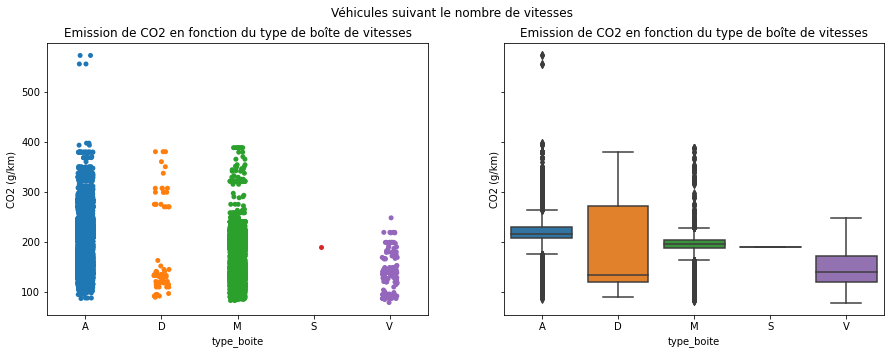

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Véhicules suivant le nombre de vitesses')

sns.stripplot(ax=axes[0], y='CO2 (g/km)', x='type_boite', data=df.sort_values(by = 'type_boite'))
axes[0].set_title('Emission de CO2 en fonction du type de boîte de vitesses')

sns.boxplot(ax=axes[1], x='type_boite', y='CO2 (g/km)', data=df.sort_values(by = 'type_boite'))
axes[1].set_title('Emission de CO2 en fonction du type de boîte de vitesses');

#Le type S semble être une valeur aberrante 
#Les boîtes V semblent moins polluantes

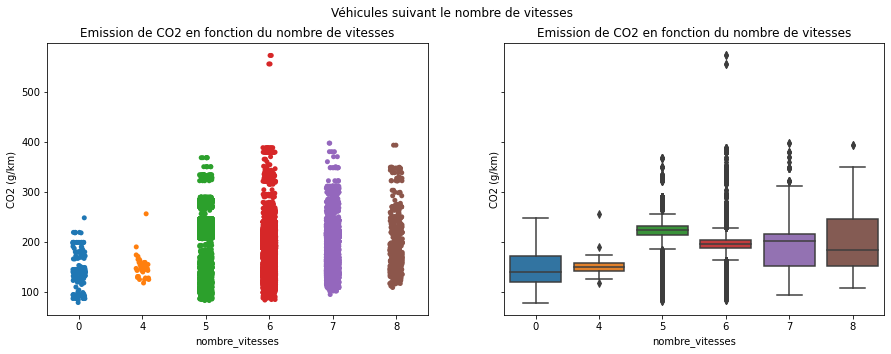

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Véhicules suivant le nombre de vitesses')

sns.stripplot(ax=axes[0], y='CO2 (g/km)', x='nombre_vitesses', data=df.sort_values(by = 'nombre_vitesses'))
axes[0].set_title('Emission de CO2 en fonction du nombre de vitesses')

sns.boxplot(ax=axes[1], x='nombre_vitesses', y='CO2 (g/km)', data=df.sort_values(by = 'nombre_vitesses'))
axes[1].set_title('Emission de CO2 en fonction du nombre de vitesses');

#Le taux d'émission de CO2 des boites à ,5 et 6 vitesses est moins dispersé que pour les autres.

In [37]:
#quelle différence il y a entre modèle dossier et modèle UTAC ?
pd.crosstab(df['Modèle dossier'],df['Modèle UTAC'],rownames=['dossier'],colnames=['UTAC'])


UTAC,107,114,116,118,120,123,125,130,135,159,...,XF,XJ,XK,XV,YARIS,YETI,YPSILON,Z4,ZAFIRA,ZAGATO
dossier,,,,,,,,,,,,,,,,,,,,,
107,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YARIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,15,0,0,0,0,0
YARIS HYBRID,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
YETI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,34,0,0,0,0


In [38]:
df.groupby(['Modèle UTAC','Modèle dossier'])['Modèle dossier'].count().head(50)

Modèle UTAC  Modèle dossier
107          107                3
114          SERIE 1            4
116          SERIE 1            9
118          SERIE 1           16
120          SERIE 1           24
123          SERIE 1            6
125          SERIE 1            5
130          SERIE 1            2
135          SERIE 1            8
159          159               12
2            MAZDA 2            7
2008         2008               6
207          207               15
208          208               18
3            MAZDA 3            6
3008         3008              11
308          308               27
316          SERIE 3           17
318          SERIE 3           16
320          SERIE 3           56
325          SERIE 3           18
328          SERIE 3            6
330          SERIE 3           22
335          SERIE 3           19
370Z         370Z               4
             370Z ROADSTER      2
4008         4008               2
458          458                8
4X4          4X4    

In [39]:
df.groupby(['Modèle UTAC','Modèle dossier'])['Modèle dossier'].count().tail(50)

Modèle UTAC  Modèle dossier      
TT           TTS ROADSTER                2
TWINGO       TWINGO                      6
UP!          UP!                         6
V40          V40                        18
             V40 CROSS COUNTRY          11
V60          V60                        16
V70          V70                        12
VANQUISH     VANQUISH                    4
VANTAGE      V12 VANTAGE                 2
             V12 VANTAGE ROADSTER        2
             V8 VANTAGE                  8
             V8 VANTAGE ROADSTER         8
             VANTAGE                    34
VELOSTER     VELOSTER                    3
VENGA        VENGA                       6
VERSO        VERSO                      10
VERSO S      VERSO S                     8
VIANO        VIANO                   14031
VITO         VITO                     9890
VIVARO       VIVARO                     22
VOYAGER      VOYAGER                     3
WIND         WIND                        1
WRANGLER     WRANGLE

In [40]:
#Le modèle UTAC est parfois plus général (exemple : Modèle UTAC XK correspond à 6 modèles dossiers différents)
#mais parfois moins (exemple : le modèle dossier série 1 correspond à plusieurs modèles UTAC)
#si l'on veut utiliser le modèle les 2 sont donc aussi pertinent l'un que l'autre
#cependant l'objectif de ce projet est de déterminer l'émission de CO2 de futurs véhicules, on peut donc supposer que ce seront de nouveaux modèles
#et que cette variable ne nous donnera donc pas d'information prédictive
#de plus les 2 variables comportent un nombre important de valeurs qualitatives différentes
#donc sont difficilement exploitables dans un modèle prédictif
#d'autant plus que pour pas mal de valeurs il y a moins de 5 véhicules. 


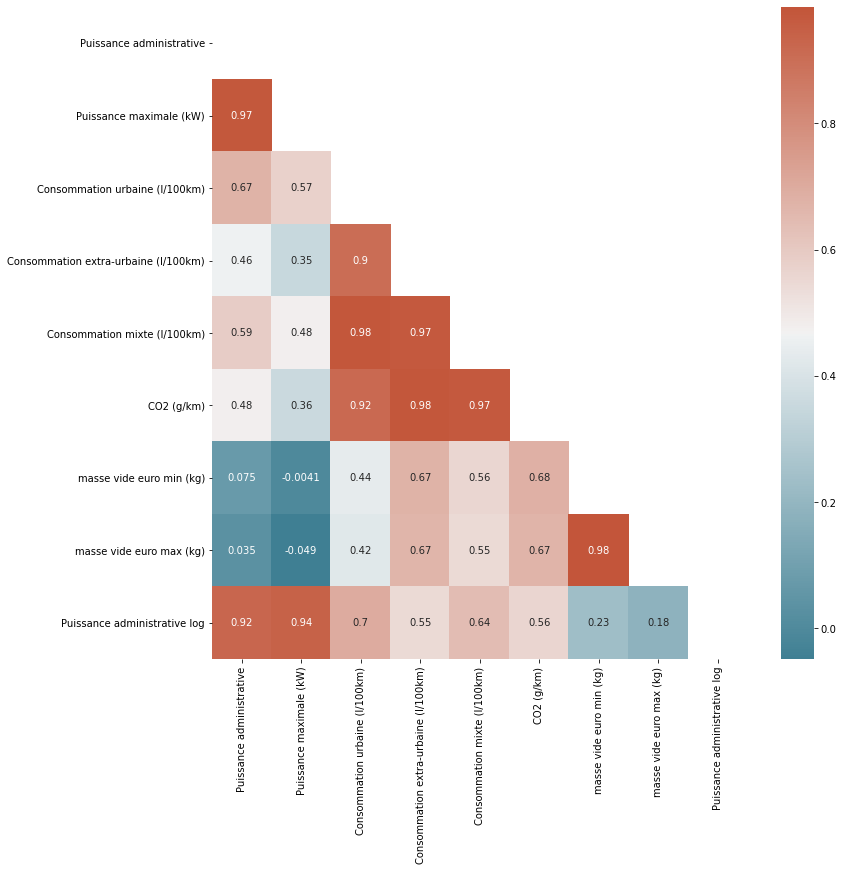

In [41]:
#il y a des correlations évidentes dans les données quantitatives ?
matrice_correlation=df.corr()
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(matrice_correlation,annot=True,ax=ax,mask=mask,cmap=sns.diverging_palette(220, 20, as_cmap=True));



In [42]:
#sans surprise la puissance administrative et la puissance maximales sont très corrélées. Dans une analyse prédictive il vaudra donc mieux n'en garder qu'une
#la puissance maximale étant plus détaillée je pense la garder plutôt que la puissance administrative
#de la même façon la masse vide min et la masse vide max sont très corrélées on pourra choisir de n'en garder qu'une ou de prendre la moyenne des 2
#la consommation urbaine, la consommation extra urbaine, la consommation mixte et l'émission de CO2 sont très fortement corrélées
#pour les 3 consommations on pourra donc ne garder que la consommation mixte
#en revanche dans le cas particulier de notre projet, nous souhaitons prédire l'émission en CO2 de véhicules qui ne sont pas encore construits
#donc nous ne connaîtrons pas encore leur consommation puisqu'elle est calculée par des tests post fabrication.




In [43]:

df['masse vide moyenne']=(df['masse vide euro min (kg)']+df['masse vide euro max (kg)'])/2
df[['masse vide moyenne','masse vide euro min (kg)','masse vide euro max (kg)']].describe()

,masse vide moyenne,masse vide euro min (kg),masse vide euro max (kg)
count,44160.000000,44160.000000,44160.000000
mean,2126.265217,2077.010711,2175.519724
std,366.098530,333.791919,401.228264
min,825.000000,825.000000,825.000000
25%,2025.500000,1976.000000,2075.000000
50%,2130.500000,2076.000000,2185.000000
75%,2299.000000,2245.000000,2355.000000
max,2905.000000,2905.000000,3094.000000


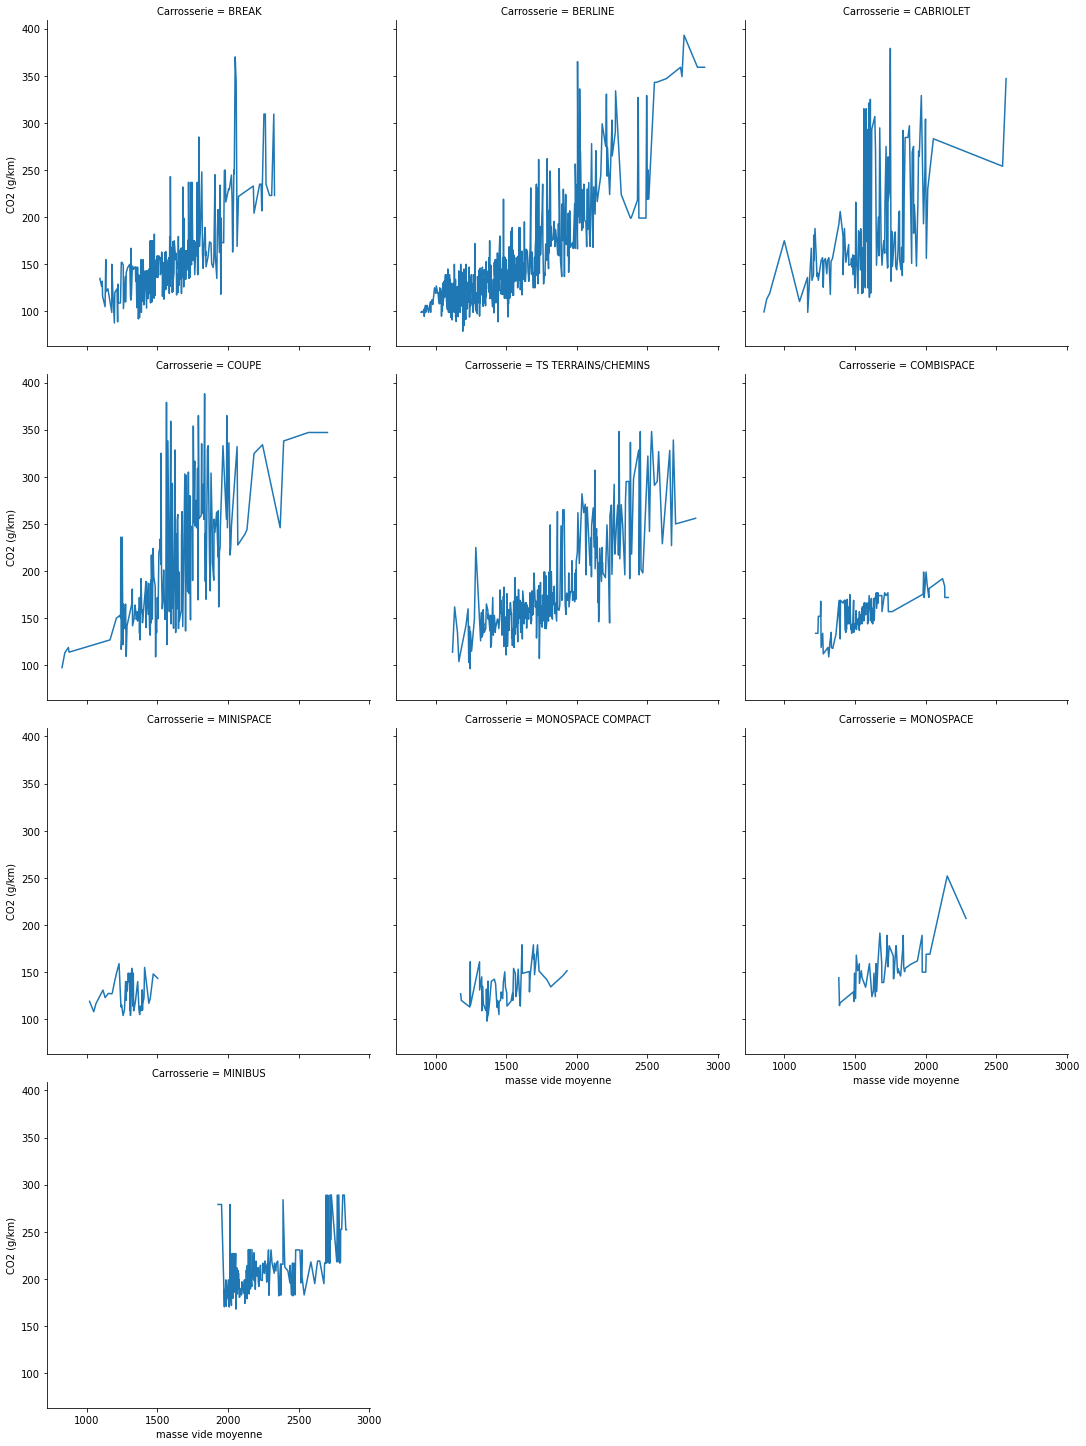

In [44]:
#Nous regardons maintenant la relation entre masse vide moyenne et émission de CO2
sns.relplot(x='masse vide moyenne', y='CO2 (g/km)', kind='line',col='Carrosserie',col_wrap=3,ci=None, data=df);
#quelque soit le type de carrosserie, plus la masse vide est élevée plus l'émission de CO2 est importante

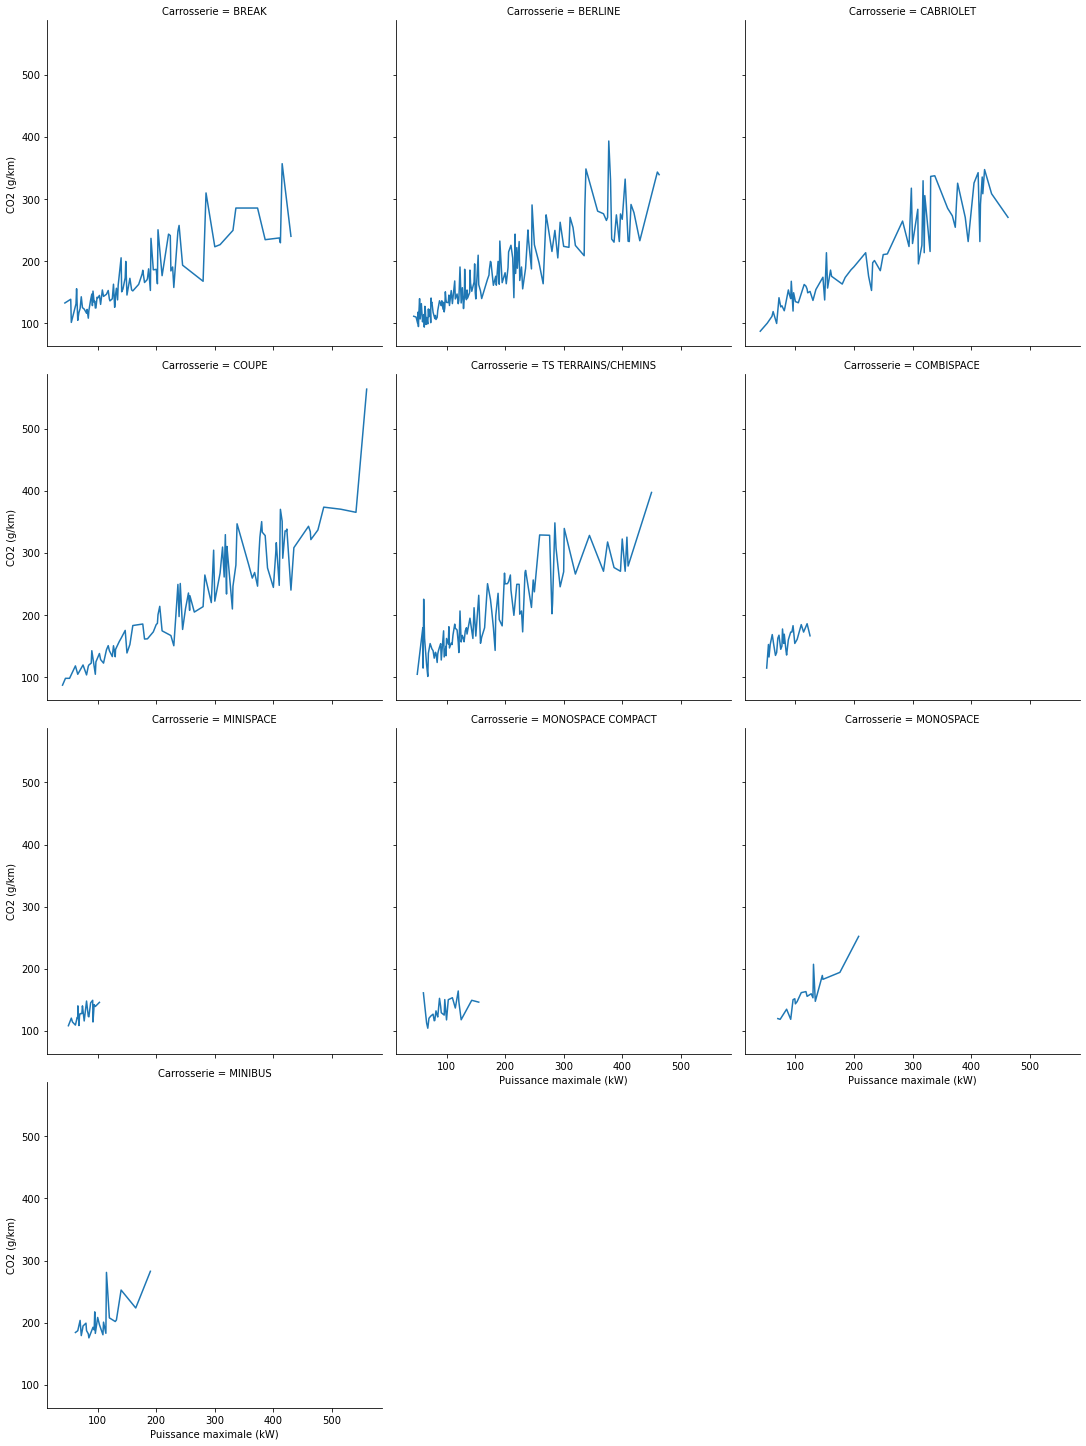

In [45]:
#Nous regardons maintenant la relation entre Puissance maximale (kW) et émission de CO2
sns.relplot(x='Puissance maximale (kW)', y='CO2 (g/km)', kind='line',col='Carrosserie',col_wrap=3,ci=None, data=df);
#quelque soit le type de carrosserie, plus la Puissance maximale (kW) est élevée plus l'émission de CO2 est importante

In [46]:
#suite à tout ce que nous avons analysé précédemment, nous créins un dataframe DATA qui ne comporte que les variables que nous garderons pour la suite du projet.
data=df[['Carburant','Hybride','Puissance maximale (kW)','type_boite','nombre_vitesses','CO2 (g/km)','Carrosserie','gamme','masse vide moyenne']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44160 entries, 0 to 44849
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Carburant                44160 non-null  object 
 1   Hybride                  44160 non-null  object 
 2   Puissance maximale (kW)  44160 non-null  float64
 3   type_boite               44160 non-null  object 
 4   nombre_vitesses          44160 non-null  object 
 5   CO2 (g/km)               44160 non-null  float64
 6   Carrosserie              44160 non-null  object 
 7   gamme                    44160 non-null  object 
 8   masse vide moyenne       44160 non-null  float64
dtypes: float64(3), object(6)
memory usage: 4.4+ MB


In [47]:
data=data.drop_duplicates(keep = 'first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 44849
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Carburant                5718 non-null   object 
 1   Hybride                  5718 non-null   object 
 2   Puissance maximale (kW)  5718 non-null   float64
 3   type_boite               5718 non-null   object 
 4   nombre_vitesses          5718 non-null   object 
 5   CO2 (g/km)               5718 non-null   float64
 6   Carrosserie              5718 non-null   object 
 7   gamme                    5718 non-null   object 
 8   masse vide moyenne       5718 non-null   float64
dtypes: float64(3), object(6)
memory usage: 446.7+ KB


In [48]:
data_feats=data.drop(['CO2 (g/km)'],axis=1)
data_feats.duplicated().sum()


1856

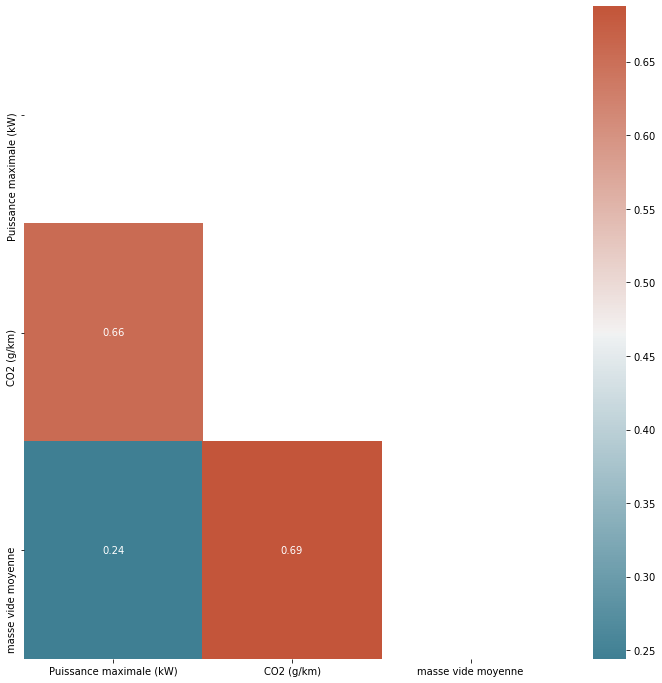

In [49]:
matrice_correlation=data.corr()
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(matrice_correlation,annot=True,ax=ax,mask=mask,cmap=sns.diverging_palette(220, 20, as_cmap=True));


In [50]:
#copie de secours avant de finir les traitements

data_copy=data.copy()

In [51]:
data=data_copy.copy() 
#encore un peu de préprocessing nécessaire
data= data.astype({"nombre_vitesses": int})
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(exclude=np.number)
data = data_num.join(pd.get_dummies(data_cat,prefix=data_cat.columns)) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 44849
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Puissance maximale (kW)          5718 non-null   float64
 1   nombre_vitesses                  5718 non-null   int32  
 2   CO2 (g/km)                       5718 non-null   float64
 3   masse vide moyenne               5718 non-null   float64
 4   Carburant_EH                     5718 non-null   uint8  
 5   Carburant_ES                     5718 non-null   uint8  
 6   Carburant_ES/GN                  5718 non-null   uint8  
 7   Carburant_ES/GP                  5718 non-null   uint8  
 8   Carburant_FE                     5718 non-null   uint8  
 9   Carburant_GH                     5718 non-null   uint8  
 10  Carburant_GN                     5718 non-null   uint8  
 11  Carburant_GN/ES                  5718 non-null   uint8  
 12  Carburant_GO       

In [52]:
data.columns

Index(['Puissance maximale (kW)', 'nombre_vitesses', 'CO2 (g/km)',
       'masse vide moyenne', 'Carburant_EH', 'Carburant_ES', 'Carburant_ES/GN',
       'Carburant_ES/GP', 'Carburant_FE', 'Carburant_GH', 'Carburant_GN',
       'Carburant_GN/ES', 'Carburant_GO', 'Carburant_GP/ES', 'Hybride_non',
       'Hybride_oui', 'type_boite_A', 'type_boite_D', 'type_boite_M',
       'type_boite_S', 'type_boite_V', 'Carrosserie_BERLINE',
       'Carrosserie_BREAK', 'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE',
       'Carrosserie_COUPE', 'Carrosserie_MINIBUS', 'Carrosserie_MINISPACE',
       'Carrosserie_MONOSPACE', 'Carrosserie_MONOSPACE COMPACT',
       'Carrosserie_TS TERRAINS/CHEMINS', 'gamme_ECONOMIQUE',
       'gamme_INFERIEURE', 'gamme_LUXE', 'gamme_MOY-INFER', 'gamme_MOY-SUPER',
       'gamme_SUPERIEURE'],
      dtype='object')

In [53]:
data.describe()

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_EH,Carburant_ES,Carburant_ES/GN,Carburant_ES/GP,Carburant_FE,Carburant_GH,...,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,...,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,133.678716,6.052641,170.480937,1777.861315,0.011717,0.363414,0.001049,0.002099,0.000874,0.002448,...,0.013466,0.015915,0.033928,0.098986,0.019237,0.138685,0.221056,0.357468,0.155649,0.107905
std,75.125533,1.112459,50.769361,444.139129,0.107620,0.481025,0.032379,0.045767,0.029560,0.049425,...,0.115270,0.125156,0.181060,0.298669,0.137371,0.345648,0.414995,0.479296,0.362554,0.310287
min,40.000000,0.000000,79.000000,825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,6.000000,134.000000,1475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.000000,6.000000,159.000000,1685.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,7.000000,203.000000,2063.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,559.300000,8.000000,572.000000,2905.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#comme déjà vu auparavant les ordres de grandeur sont très différents, nous allons donc centrer et réduire les valeurs
from sklearn import preprocessing
scaler=preprocessing.RobustScaler()
data=pd.DataFrame(scaler.fit_transform(data),index=data.index, columns=data.columns)
data.describe()

#le résultat du préprocessing est bien visible sur le describe

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_EH,Carburant_ES,Carburant_ES/GN,Carburant_ES/GP,Carburant_FE,Carburant_GH,...,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,...,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,0.301270,0.052641,0.166390,0.157860,0.011717,0.363414,0.001049,0.002099,0.000874,0.002448,...,0.013466,0.015915,0.033928,0.098986,0.019237,0.138685,0.221056,0.357468,0.155649,0.107905
std,1.211702,1.112459,0.735788,0.755018,0.107620,0.481025,0.032379,0.045767,0.029560,0.049425,...,0.115270,0.125156,0.181060,0.298669,0.137371,0.345648,0.414995,0.479296,0.362554,0.310287
min,-1.209677,-6.000000,-1.159420,-1.461963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.435484,0.000000,-0.362319,-0.356991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564516,1.000000,0.637681,0.643009,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.166129,2.000000,5.985507,2.073948,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#Maintenant créons les jeux de données
feats=data.drop(['CO2 (g/km)'],axis=1)
target=data['CO2 (g/km)']


In [56]:
#importation de train test split et de modèles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import RidgeCV , LassoCV, lasso_path
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score


In [57]:
#nous créons un jeu d'entraintement de 80% de la base et un jeu de test de 20%
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=1)
#et un jeu de validation de 25% du jeu d'entrainement, soit 20% de la base initiale, et le jeu d'entrainement est de 60% de la base initiale
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [58]:
#commençons par une simple régression linéaire 
lr=linear_model.LinearRegression ()
lr.fit(X_train, y_train)                        
y_predict = lr.predict(X_test)

print('train score :',lr.score(X_train,y_train))
print('train mse :',mean_squared_error(lr.predict(X_train),y_train))

print('test mse :',mean_squared_error(y_predict,y_test))
print('test score:',lr.score(X_test,y_test))


train score : 0.8721553047193233
train mse : 0.07125142179621796
test mse : 0.07094072145196247
test score: 0.8666981496755275


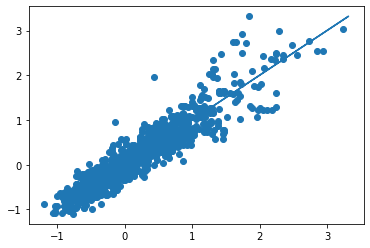

In [59]:
#visualisation de la prédiction
plt.scatter(y_predict, y_test)
plt.plot(y_test.values,y_test.values);
#à part un point les prédictions sont bien réparties autour de la droite x=y des valeurs y_tests.

In [60]:
#La régression linéaire donne un bon résultat, de plus le score est meilleur sur les données de test que 
#d'entrainement, il n'y a donc pas de problème de surapprentissage

#nous allons tester un modèle Ridge pour voir si cela améliore les résultats

ridge_reg=RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
print('alpha :',ridge_reg.alpha_)
print('train score :',ridge_reg.score(X_train,y_train))
print('test score :',ridge_reg.score(X_test,y_test))
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print('mse train :', mean_squared_error(ridge_pred_train, y_train))
print('mse test :', mean_squared_error(ridge_pred_test, y_test))

alpha : 0.7
train score : 0.8721274847150107
test score : 0.8669428149226113
mse train : 0.07126692666215942
mse test : 0.07081051523876963


In [61]:
#les résultats sont équivalents avec RidgeCV qu'avec ka régression linéaire. Nous allons regarder si 
#certaines variables sont plus intéreessantes en utilisant les fonctionnalités de lasso
mes_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)
coefs_lasso.shape


(36, 10)

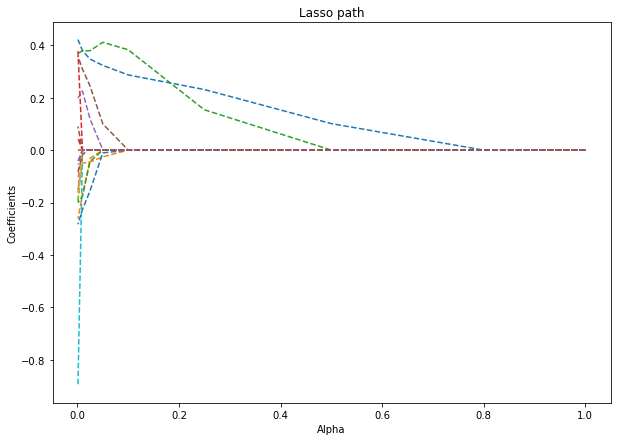

In [62]:
plt.figure(figsize=(10, 7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path');

In [63]:
#nous voyons graphiquement que le nombre de variables conservées diminue très vite. 
#pour bien le visualiser nous allons afficher le nombre de variable conservée en fonction d'alpha.
coef_alpha=[]
coef_nul_alpha=[]
score=[]
for i in range(alpha_path.shape[0]):
    coef_alpha.append(sum(x!=0 for x in coefs_lasso[:,i]))
    coef_nul_alpha.append(sum(x==0 for x in coefs_lasso[:,i]))
    
alpha_variables=pd.DataFrame({'nombre variables conservées': coef_alpha,'variables supprimées':coef_nul_alpha}, index=alpha_path) 

In [64]:
alpha_variables

,nombre variables conservées,variables supprimées
1.000,0,36
0.800,0,36
0.500,1,35
0.250,2,34
0.100,2,34
0.050,6,30
0.025,8,28
0.020,8,28
0.010,9,27
0.001,23,13


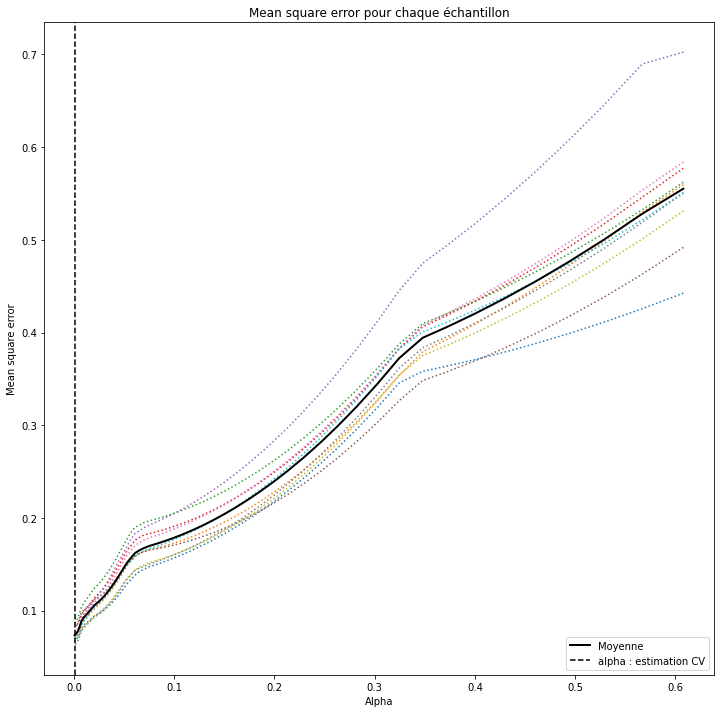

In [65]:
#Effectivement le nombre de variables conservées baisse de presqu'un tiers avec alpha passant de 0.001 à 0.01
#nous allons maintenant faire un lassocv pour optimiser le modèle

model_lasso=LassoCV(cv=10)
model_lasso.fit(X_train,y_train)
alphas=model_lasso.alphas_

plt.figure(figsize=(12,12))
plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

In [66]:
print('alpha :',model_lasso.alpha_)

print('train score :',model_lasso.score(X_train,y_train))
print('test score :',model_lasso.score(X_test,y_test))
model_lasso_pred_train = model_lasso.predict(X_train)
model_lasso_pred_test = model_lasso.predict(X_test)

print('mse train :', mean_squared_error(model_lasso_pred_train, y_train))
print('mse test :', mean_squared_error(model_lasso_pred_test, y_test))

alpha : 0.0006079960180680392
train score : 0.87055287965147
test score : 0.867332632308378
mse train : 0.07214449807252167
mse test : 0.07060306180497636


In [67]:
#le score sur les données de test est très légèrement supérieur à celui des modèles Ridge et régression linéaire.

In [68]:
#regardons combien de variables a conservé le modèle
coeffs = list(model_lasso.coef_)
variables = list(feats.columns)
coefficients=pd.DataFrame({'valeur estimée': coeffs}, index=variables)
print('nombre de variables éliminées :',len(coefficients[coefficients['valeur estimée']==0]) )
print('nombre de variables conservées :',len(coefficients[coefficients['valeur estimée']!=0]) )

nombre de variables éliminées : 11
nombre de variables conservées : 25


In [69]:
#et regardons les variables les plus importantes et leur coefficient.
coefficients['valeur absolue']=np.abs(coefficients['valeur estimée'])
#comme pour le coefficient de correlation les valeurs négatives sont importantes,
#pour sélectionner les variables les plus importantes, nous prenons donc la valeur absolue des coefficient
coefficients=coefficients.sort_values(by='valeur absolue' , ascending = False)
print("les variables classées par ordre d'importance sont : \n",coefficients)

les variables classées par ordre d'importance sont : 
                                  valeur estimée  valeur absolue
type_boite_V                      -9.685297e-01    9.685297e-01
Carrosserie_MINIBUS                5.716784e-01    5.716784e-01
Puissance maximale (kW)            4.217583e-01    4.217583e-01
Hybride_non                        3.930381e-01    3.930381e-01
masse vide moyenne                 3.524322e-01    3.524322e-01
Carrosserie_COMBISPACE             2.611338e-01    2.611338e-01
Carburant_ES/GP                    2.216405e-01    2.216405e-01
Carburant_ES                       2.037105e-01    2.037105e-01
Carrosserie_TS TERRAINS/CHEMINS    1.892962e-01    1.892962e-01
nombre_vitesses                   -1.643564e-01    1.643564e-01
gamme_LUXE                        -1.367784e-01    1.367784e-01
Carburant_GO                      -1.179703e-01    1.179703e-01
type_boite_A                       1.034066e-01    1.034066e-01
Carrosserie_BERLINE               -1.023729e-01  

In [70]:
#Carrosserie_MINIBUS,Puissance maximale (kW),masse vide moyenne,Carburant_ES,nombre_vitesses,type_boite_A,Carrosserie_BERLINE,type_boite_V
#sont les principales variables explicatives, ce n'est pas surprenant aux vus des correlations que nous avons mis en avant 
#dans la DataViz.
#dans la prochaine itération nous testerons l'encodage pour les variables modales, au lieu de getdummies


L'itération 2 commence ici.

In [71]:
data=data_copy.copy() 
#encore un peu de préprocessing nécessaire
data= data.astype({"nombre_vitesses": int})
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(exclude=np.number)


In [72]:
data_cat.head()

,Carburant,Hybride,type_boite,Carrosserie,gamme
0,ES,non,M,BREAK,MOY-SUPER
1,GO,non,M,BERLINE,MOY-SUPER
2,GO,non,M,BERLINE,MOY-SUPER
4,GO,non,M,BERLINE,MOY-SUPER
6,ES,non,M,BREAK,MOY-SUPER


In [73]:
data_cat["Carburant_new"]=data_cat["Carburant"].astype('category').cat.codes
data_cat.groupby(['Carburant', 'Carburant_new']).size()
#la labellisation se fait par ordre alphabétique, je garde quand même l'affichage de la correspondance pour s'y retrouver facielement

<ipython-input-73-9eb9433389cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat["Carburant_new"]=data_cat["Carburant"].astype('category').cat.codes


Carburant  Carburant_new
EH         0                  67
ES         1                2078
ES/GN      2                   6
ES/GP      3                  12
FE         4                   5
GH         5                  14
GN         6                  15
GN/ES      7                   6
GO         8                3503
GP/ES      9                  12
dtype: int64

In [74]:
data_cat["Hybride_new"]=data_cat["Hybride"].astype('category').cat.codes
data_cat.groupby(['Hybride', 'Hybride_new']).size()

<ipython-input-74-1d61d3d8bbc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat["Hybride_new"]=data_cat["Hybride"].astype('category').cat.codes


Hybride  Hybride_new
non      0              5637
oui      1                81
dtype: int64

In [75]:
data_cat["type_boite_new"]=data_cat["type_boite"].astype('category').cat.codes
data_cat.groupby(['type_boite', 'type_boite_new']).size()

<ipython-input-75-20d192e603c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat["type_boite_new"]=data_cat["type_boite"].astype('category').cat.codes


type_boite  type_boite_new
A           0                 2632
D           1                   41
M           2                 2955
S           3                    1
V           4                   89
dtype: int64

In [76]:
data_cat["Carrosserie_new"]=data_cat["Carrosserie"].astype('category').cat.codes
data_cat.groupby(['Carrosserie', 'Carrosserie_new']).size()

Carrosserie          Carrosserie_new
BERLINE              0                  1745
BREAK                1                   708
CABRIOLET            2                   299
COMBISPACE           3                   275
COUPE                4                   421
MINIBUS              5                  1342
MINISPACE            6                    77
MONOSPACE            7                    91
MONOSPACE COMPACT    8                   194
TS TERRAINS/CHEMINS  9                   566
dtype: int64

In [77]:
data_cat["gamme_new"]=data_cat["gamme"].astype('category').cat.codes
data_cat.groupby(['gamme', 'gamme_new']).size()

gamme       gamme_new
ECONOMIQUE  0             110
INFERIEURE  1             793
LUXE        2            1264
MOY-INFER   3            2044
MOY-SUPER   4             890
SUPERIEURE  5             617
dtype: int64

In [78]:
data_cat_new=data_cat.drop(['Carburant','Hybride','type_boite','Carrosserie','gamme'],axis=1)

In [79]:
data = data_num.join(data_cat_new)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 44849
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Puissance maximale (kW)  5718 non-null   float64
 1   nombre_vitesses          5718 non-null   int32  
 2   CO2 (g/km)               5718 non-null   float64
 3   masse vide moyenne       5718 non-null   float64
 4   Carburant_new            5718 non-null   int8   
 5   Hybride_new              5718 non-null   int8   
 6   type_boite_new           5718 non-null   int8   
 7   Carrosserie_new          5718 non-null   int8   
 8   gamme_new                5718 non-null   int8   
dtypes: float64(3), int32(1), int8(5)
memory usage: 358.0 KB


In [80]:
data.head()

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_new,Hybride_new,type_boite_new,Carrosserie_new,gamme_new
0,147.0,6,182.0,1505.0,1,0,2,1,4
1,125.0,6,136.0,1565.0,8,0,2,0,4
2,100.0,6,134.0,1565.0,8,0,2,0,4
4,125.0,6,139.0,1565.0,8,0,2,0,4
6,147.0,6,186.0,1555.0,1,0,2,1,4


In [81]:
data.describe()

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_new,Hybride_new,type_boite_new,Carrosserie_new,gamme_new
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,133.678716,6.052641,170.480937,1777.861315,5.330535,0.014166,1.103533,3.195173,2.815320
std,75.125533,1.112459,50.769361,444.139129,3.401923,0.118184,1.052306,3.009581,1.225707
min,40.000000,0.000000,79.000000,825.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,6.000000,134.000000,1475.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,115.000000,6.000000,159.000000,1685.000000,8.000000,0.000000,2.000000,3.000000,3.000000
75%,150.000000,7.000000,203.000000,2063.250000,8.000000,0.000000,2.000000,5.000000,4.000000
max,559.300000,8.000000,572.000000,2905.000000,9.000000,1.000000,4.000000,9.000000,5.000000


In [82]:
#comme déjà vu auparavant les ordres de grandeur sont très différents, nous allons donc centrer et réduire les valeurs

scaler=preprocessing.RobustScaler()
data=pd.DataFrame(scaler.fit_transform(data),index=data.index, columns=data.columns)
data.describe()

#le résultat du préprocessing est bien visible sur le describe

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_new,Hybride_new,type_boite_new,Carrosserie_new,gamme_new
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,0.301270,0.052641,0.166390,0.157860,-0.381352,0.014166,-0.448234,0.039035,-0.092340
std,1.211702,1.112459,0.735788,0.755018,0.485989,0.118184,0.526153,0.601916,0.612853
min,-1.209677,-6.000000,-1.159420,-1.461963,-1.142857,0.000000,-1.000000,-0.600000,-1.500000
25%,-0.435484,0.000000,-0.362319,-0.356991,-1.000000,0.000000,-1.000000,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564516,1.000000,0.637681,0.643009,0.000000,0.000000,0.000000,0.400000,0.500000
max,7.166129,2.000000,5.985507,2.073948,0.142857,1.000000,1.000000,1.200000,1.000000


In [83]:
#Maintenant créons les jeux de données
feats=data.drop(['CO2 (g/km)'],axis=1)
target=data['CO2 (g/km)']


In [84]:
#nous créons un jeu d'entraintement de 80% de la base et un jeu de test de 20%
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=1)
#et un jeu de validation de 25% du jeu d'entrainement, soit 20% de la base initiale, et le jeu d'entrainement est de 60% de la base initiale
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [85]:
#commençons par une simple régression linéaire 
lr=linear_model.LinearRegression ()
lr.fit(X_train, y_train)                        
y_predict = lr.predict(X_test)

print('train score :',lr.score(X_train,y_train))
print('train mse :',mean_squared_error(lr.predict(X_train),y_train))

print('test mse :',mean_squared_error(y_predict,y_test))
print('test score:',lr.score(X_test,y_test))


train score : 0.8071809744098404
train mse : 0.10746343203758067
test mse : 0.09722297907360919
test score: 0.8173122187184769


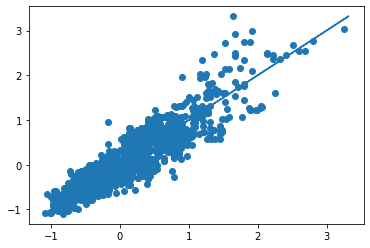

In [86]:
#Le score est presque 10 points moins bon qu'avec le get_dummies
#visualisation de la prédiction
plt.scatter(y_predict, y_test)
plt.plot(y_test.values,y_test.values);
#cela se confirme graphiquement avec des points un peu plus largement écartés de la droite de régression

In [87]:
#nous allons tester un modèle Ridge pour voir si cela améliore les résultats

ridge_reg=RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
print('alpha :',ridge_reg.alpha_)
print('train score :',ridge_reg.score(X_train,y_train))
print('test score :',ridge_reg.score(X_test,y_test))
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

print('mse train :', mean_squared_error(ridge_pred_train, y_train))
print('mse test :', mean_squared_error(ridge_pred_test, y_test))

alpha : 0.3
train score : 0.807179628654583
test score : 0.8173018175538275
mse train : 0.10746418206459797
mse test : 0.09722851437655038


In [88]:
#là encore l'encodage nous fait perdre des points. 
#Nous allons regarder si 
#certaines variables sont plus intéreessantes en utilisant les fonctionnalités de lasso
mes_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)
coefs_lasso.shape


(8, 10)

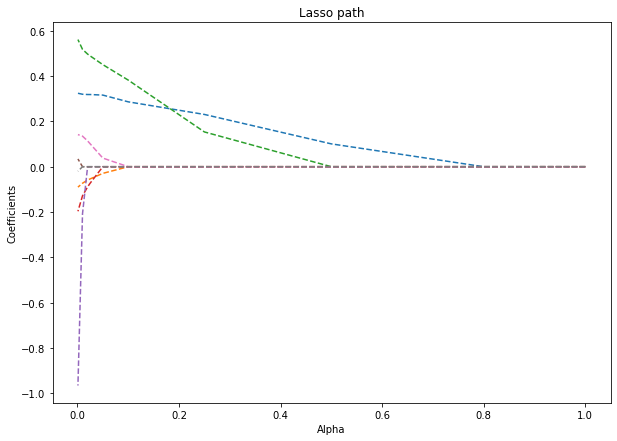

In [89]:
plt.figure(figsize=(10, 7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path');

In [90]:
#nous voyons graphiquement que le nombre de variables conservées diminue moins vite qu'avec le pd_get_dummies. ce qui est logique puisqu'il y a beaucoup moins de variables. 
#pour bien le visualiser nous allons afficher le nombre de variables conservées en fonction d'alpha.
coef_alpha=[]
coef_nul_alpha=[]
score=[]
for i in range(alpha_path.shape[0]):
    coef_alpha.append(sum(x!=0 for x in coefs_lasso[:,i]))
    coef_nul_alpha.append(sum(x==0 for x in coefs_lasso[:,i]))
    
alpha_variables=pd.DataFrame({'nombre variables conservées': coef_alpha,'variables supprimées':coef_nul_alpha}, index=alpha_path) 

In [91]:
alpha_variables

,nombre variables conservées,variables supprimées
1.000,0,8
0.800,0,8
0.500,1,7
0.250,2,6
0.100,2,6
0.050,4,4
0.025,5,3
0.020,5,3
0.010,6,2
0.001,8,0


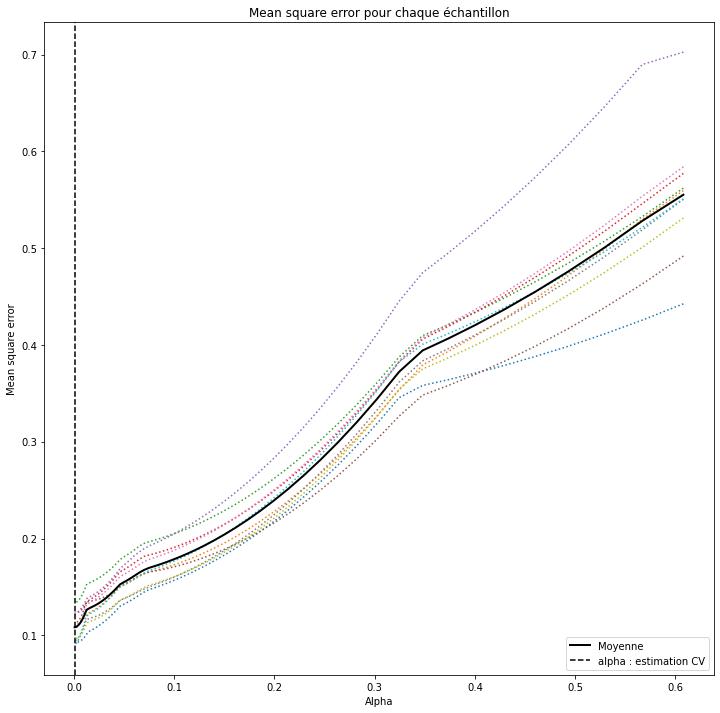

In [92]:
#Effectivement le nombre de variables reste inchangé avec alpha passant de 0.001 à 0.025
#nous allons maintenant faire un lassocv pour optimiser le modèle

model_lasso=LassoCV(cv=10)
model_lasso.fit(X_train,y_train)
alphas=model_lasso.alphas_

plt.figure(figsize=(12,12))
plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

In [93]:
print('alpha :',model_lasso.alpha_)

print('train score :',model_lasso.score(X_train,y_train))
print('test score :',model_lasso.score(X_test,y_test))
model_lasso_pred_train = model_lasso.predict(X_train)
model_lasso_pred_test = model_lasso.predict(X_test)

print('mse train :', mean_squared_error(model_lasso_pred_train, y_train))
print('mse test :', mean_squared_error(model_lasso_pred_test, y_test))

alpha : 0.0006079960180680392
train score : 0.8071061004008959
test score : 0.8173188896247112
mse train : 0.10750516141541026
mse test : 0.09721942894358589


In [94]:
#regardons combien de variables a conservé le modèle
coeffs = list(model_lasso.coef_)
variables = list(feats.columns)
coefficients=pd.DataFrame({'valeur estimée': coeffs}, index=variables)
print('nombre de variables éliminées :',len(coefficients[coefficients['valeur estimée']==0]) )
print('nombre de variables conservées :',len(coefficients[coefficients['valeur estimée']!=0]) )

nombre de variables éliminées : 0
nombre de variables conservées : 8


In [95]:
#et regardons les variables les plus importantes et leur coefficient.
coefficients['valeur absolue']=np.abs(coefficients['valeur estimée'])
#comme pour le coefficient de correlation les valeurs négatives sont importantes,
#pour sélectionner les variables les plus importantes, nous prenons donc la valeur absolue des coefficient
coefficients=coefficients.sort_values(by='valeur absolue' , ascending = False)
print("les variables classées par ordre d'importance sont : \n",coefficients)

les variables classées par ordre d'importance sont : 
                          valeur estimée  valeur absolue
Hybride_new                   -1.027045        1.027045
masse vide moyenne             0.610060        0.610060
Carburant_new                 -0.349880        0.349880
Puissance maximale (kW)        0.297157        0.297157
Carrosserie_new                0.148854        0.148854
nombre_vitesses               -0.117576        0.117576
type_boite_new                -0.095465        0.095465
gamme_new                     -0.032729        0.032729


In [96]:
#le résultat du Ridge avec alpha : 0.3 est très légèrement supérieur à la régression, c'est donc le modèle que je vais conserver
#et essayer d'améliorer par la feature selection. 
#Je crée un nouveau notebook sur cette base pour ne pas alourdir celui-ci qui devient illisible. pour cela j'exporte ma data_copy en csv.



In [97]:
data_copy.to_csv('data_avant_preprocessing.csv')